In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
url="https://drive.google.com/file/d/16JuZpn-BOb1UpHHa55oFwI_Jp2LDS2ak/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
X = df.drop('test_result' , axis=1)
y = df['test_result']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()

In [6]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
 # help(LogisticRegression)

In [9]:
log_model = LogisticRegression()

In [10]:
log_model.fit(X_train,y_train)

LogisticRegression()

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

age feature has negative coeff i.e as age feature increase the prob of belonging to 1 would decrease and vice versa for physical score

In [11]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [13]:
y_pred = log_model.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.93

In [15]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[172,  21],
       [ 14, 293]], dtype=int64)

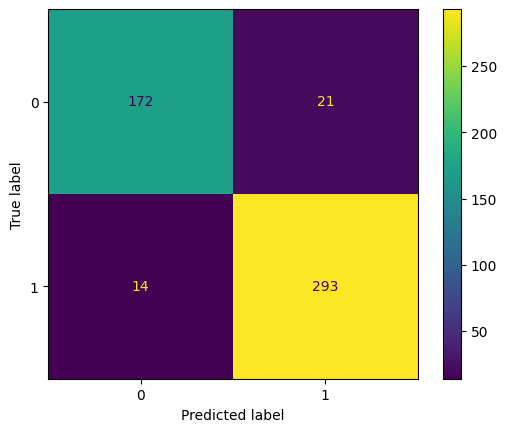

In [16]:
ConfusionMatrixDisplay.from_estimator(log_model , X_test , y_test , xticks_rotation='horizontal')

In [17]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [18]:
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay

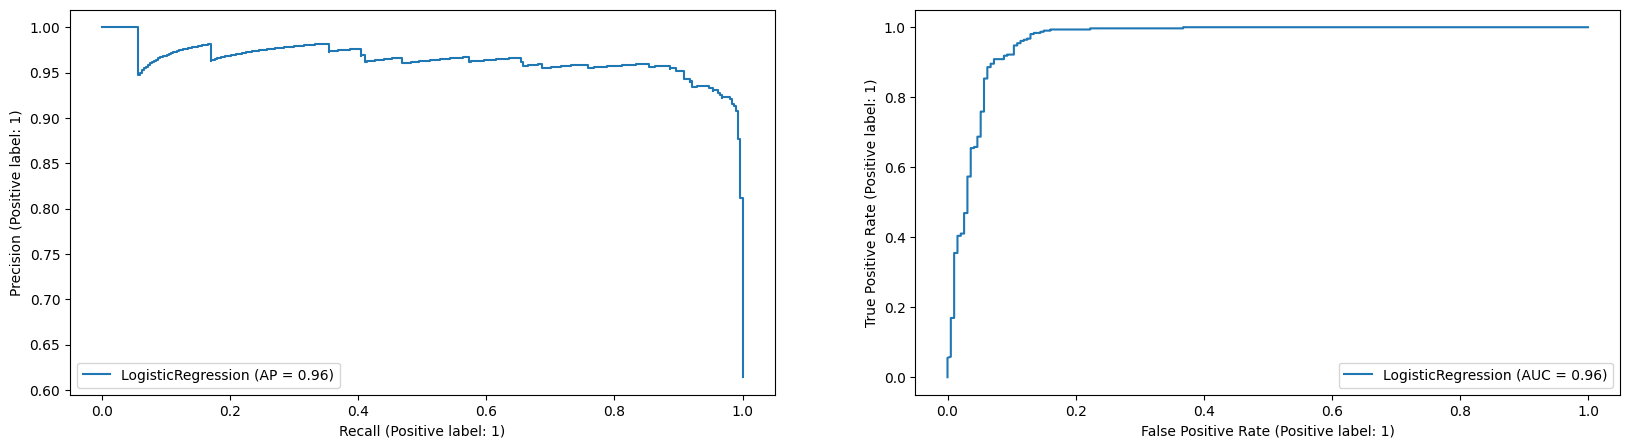

In [32]:
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(20,5))
PrecisionRecallDisplay.from_estimator(log_model,X_test,y_test, ax=ax[0])
RocCurveDisplay.from_estimator(log_model,X_test,y_test, ax=ax[1])